**Варіант 18(9)**

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import math

Функція для переведення числа в базу-5

In [10]:
def to_base_5(n, length):
    if n == 0:
        return '0' * length
    digits = []
    while n:
        digits.append(int(n % 5))
        n //= 5
    while len(digits) < length:
        digits.append(0)
    return ''.join(str(x) for x in digits[::-1])

Генерація точок в діапазоні [0, 1] для x та y без цифр 0 та 4 в базі-5

In [3]:
def generate_fractal_points(base, depth):
    valid_digits = [1, 2, 3]  
    max_number = base**depth
    points = []

    for i in range(max_number):
        x_base5 = to_base_5(i, depth)
        if all(int(d) in valid_digits for d in x_base5):
            x = sum(int(d) * (base**(-j-1)) for j, d in enumerate(x_base5))
            for j in range(max_number):
                y_base5 = to_base_5(j, depth)
                if all(int(d) in valid_digits for d in y_base5):
                    y = sum(int(d) * (base**(-k-1)) for k, d in enumerate(y_base5))
                    points.append((x, y))

    return points
    
base = 5
depth = 3
points = generate_fractal_points(base, depth)
print(f"Згенеровано {len(points)} точок.")

Згенеровано 729 точок.


Обчислення фрактальної розмірності 

Використаємо формулу: **$D = \frac{\log(N)}{\log(S)}$**

Масштабний фактор (S): Кожна координата у системі числення за основою 5 може мати лише цифри 1, 2, або 3, що означає, що при кожному кроці ми залишаємо лише 3/5 частини координат.
Таким чином масштабний фактор S=5

Кількість копій (N): Ми залишаємо 3 допустимі цифри з 5 для кожної координати. На площині це означає, що для кожного квадрата розміру 1/5, ми маємо 3 можливих варіанти по горизонталі і 3 по вертикалі.
Тобто N=3*3=9

In [13]:
S=5
N=9
D=math.log(N) / math.log(S)
print(f"Фрактальна розмірність: {D:.5f}")

Фрактальна розмірність: 1.36521


 Функція для побудови точок фракталу

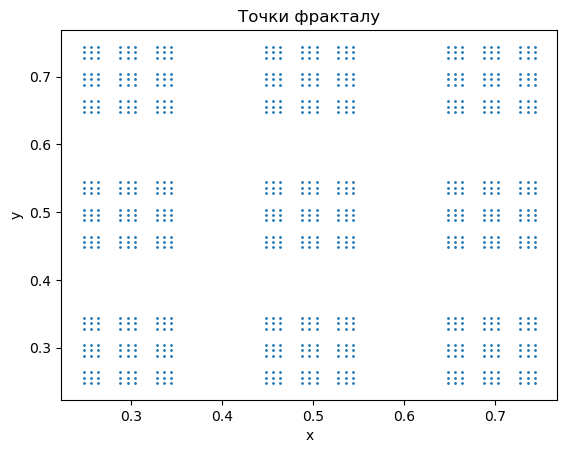

In [5]:
def plot_fractal(points):
    x_vals = [p[0] for p in points]
    y_vals = [p[1] for p in points]
    plt.scatter(x_vals, y_vals, s=1)
    plt.title('Точки фракталу')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

plot_fractal(points)
